# Objectives 
YWBAT
* list examples of when AB testing can be used in the real world 
* how to design an AB test
* how this can be used to inform business


# Outline
* discuss how to setup an AB test 
* load in data from ab testing lab today 
* perform eda on our data 
* how can this be used to inform business? pros and cons

## What are the steps in setting up an AB Test
* define scenario
* identify groups
    * A group - experiment
    * B group - control
* decide which metric to measure
    * we can measure multiple things at once
* decide what to test 
* define null hypothesis
* define alpha threshold
    * set confidence and level and power 
* define duration
    * either by time or iterations (frequentist)

# Examples
* testing a experimental landing page with a current landing page
* test email advertisements (control email vs experiment email)
* drug trials (placebo group vs non-placebo group)
* testing the difficult of a specific level in video games (control is current level experimental is adjusted level)
* (hypothesis testing) SETI signal analysis (radio signals) control - earth radio signals vs ET radio signals
* lesson structures for schools
* measure how a given condition effects a population
* mascots in marketing campaign

In [117]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import scipy.stats as scs

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv("../data/homepage_actions.csv")
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [102]:
df['action'].unique()

array(['view', 'click'], dtype=object)

#### plot a bar graph of all the actions colored by group using plotly or seaborn

In [104]:
fig = px.bar(data_frame=df, x='action', color='group', barmode='group')
fig.show()

# control group has lower click through rate

In [105]:
df_action = pd.get_dummies(df.drop(columns=['id', 'timestamp']), columns=['action'])
df_action.head()

,group,action_click,action_view
0,experiment,0,1
1,experiment,0,1
2,experiment,0,1
3,control,0,1
4,experiment,0,1


In [107]:
df_action_groupby = df_action.groupby(by='group').agg(sum)
df_action_groupby

,action_click,action_view
group,,
control,932.0,3332.0
experiment,928.0,2996.0


### what is the expected number of clicks in our experimetnal gruop we should see given the control group? 

In [109]:
mean_clicks_control = 932/(932+3332)
mean_clicks_control

0.21857410881801126

In [110]:
expected_experimental_clicks = mean_clicks_control*(928+2996)
expected_experimental_clicks

857.6848030018762

### what is the actual number clicks in the experimental group? 

In [111]:
# actual number is 928 
diff = 928 - expected_experimental_clicks
diff

70.31519699812384

### how many standard deviations is this from the control group mean? 

In [115]:
n = 928.0 + 2996.0
p = mean_clicks_control
var = n*p*(1-p)
std = np.sqrt(var)
std

25.888551746650283

In [116]:
std_experimental = diff/std
std_experimental

2.71607302278784

### calculate a pvalue for this z score

In [123]:
scs.norm.sf(2.71)

0.0033641604066691933

### What can we conclude? 

the experimental page has more clicks per view with an alpha of 0.05

### Given this is a real situation? What are the pros and cons of experimenting this way in a business setting? 
Pros
* customer driven data 
    * customer driven feedback
* controlled with clear parameters
* data driven decision making > gut feeling decision making
* clear methodology with best practices

Cons
* customers are seeing the new page
* risk losing business and diminishing the customer engagement
* wait to make a better change

# Multi-Arm Bandit Testing

<img src="../images/multi-arm-bandit.jpg"/>

# Balance between Exploitation vs Exploration

#### MultiArm Bandit testing relies on 
using results to inform future decisions while experimenting. It doesn't rely on setting a due date or a number of iterations to stop the experiment. It's strength is in its ability to change as data comes in. 

In [70]:
import scipy.stats as scs

In [158]:
# beta distributions
# params = a, b
beta1 = scs.beta(a=1, b=1) # webpage A
beta2 = scs.beta(a=1, b=1) # webpage B

In [159]:
def get_pdf_beta(beta):
    """returns x and pdf values for beta distribution"""
    x = np.linspace(beta.ppf(0.01), beta.ppf(0.99), 1000)
    pdf = beta.pdf(x)
    return x, pdf


def plot_beta_distribution(beta):
    x, pdf = get_pdf_beta(beta)
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.plot(x, pdf)
    fig.show()
    pass
    
def plot_beta_distributions(beta1, beta2):
    x1, pdf1 = get_pdf_beta(beta1)
    x2, pdf2 = get_pdf_beta(beta2)
    fig = plt.figure(figsize=(8, 5))
    plt.plot(x1, pdf1, label='beta1')
    plt.plot(x2, pdf2, label='beta2')
    plt.legend()
    plt.show()
    pass

In [171]:
# let's say we have 2 webpages A and B

# for every customer, we need to choose a webpage 

def sample_beta(beta, epsilon=0.30):
    a = beta.kwds['a']
    b = beta.kwds['b']
    sample = np.random.beta(a=a, b=b, size=1)
    return sample


def choose_page(beta1, beta2, epsilon=0.30):
    rand_num = np.random.rand()
    if rand_num < epsilon:
        print("this was random!")
        return np.random.choice([0, 1])
    sample_A = sample_beta(beta1, epsilon=epsilon)
    sample_B = sample_beta(beta2, epsilon=epsilon)
    return sample_B > sample_A # this is greedy


def did_engage():
    return np.random.choice([0, 1])


def change_beta(beta, engagement):
    if engagement:
        beta.kwds['a'] += 1
    else:
        beta.kwds['b'] += 1
    return beta

In [172]:
# if choose_page = False -> let's serve A
# if choose_page = True -> let's serve B

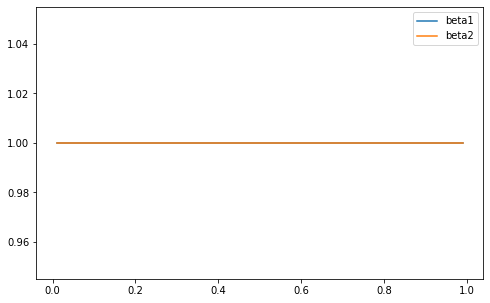

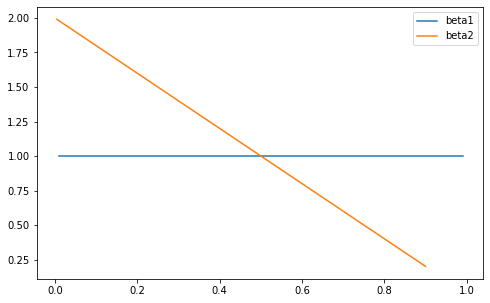

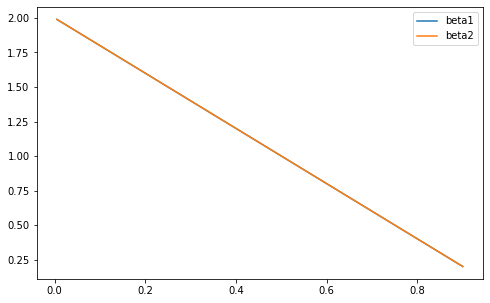

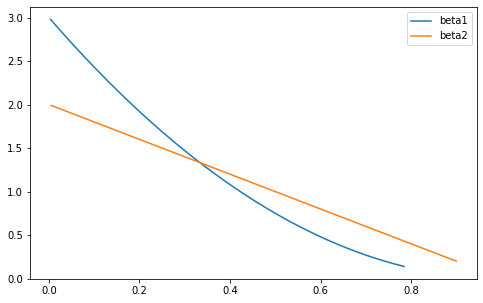

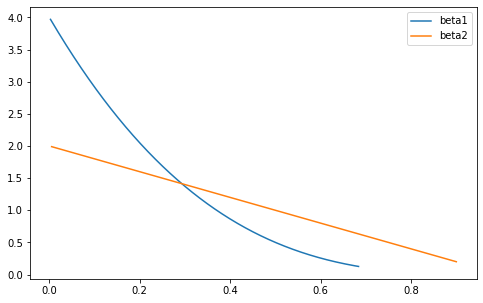

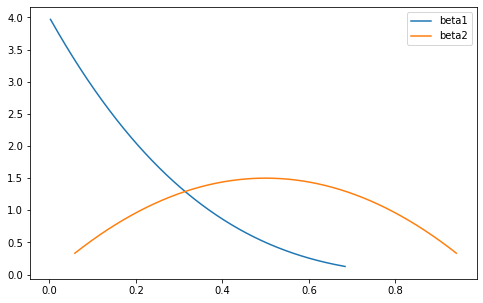

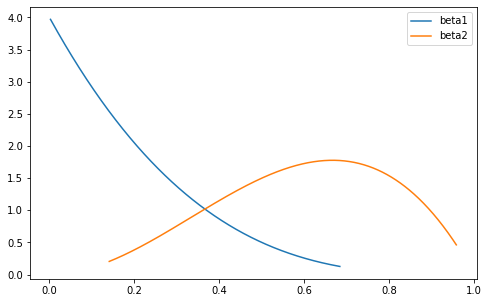

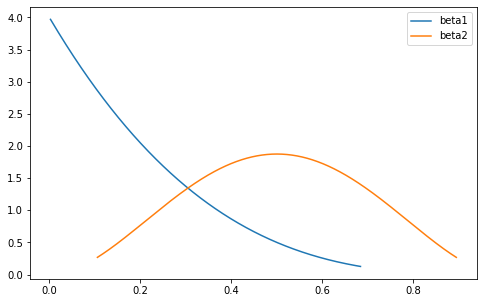

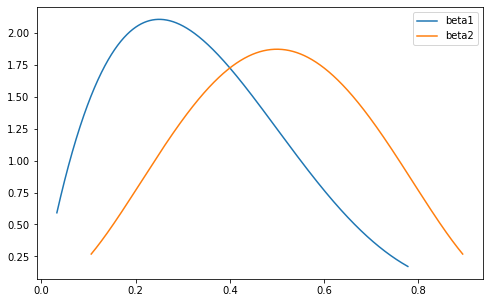

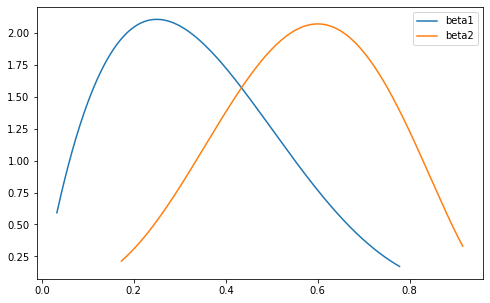

this was random!


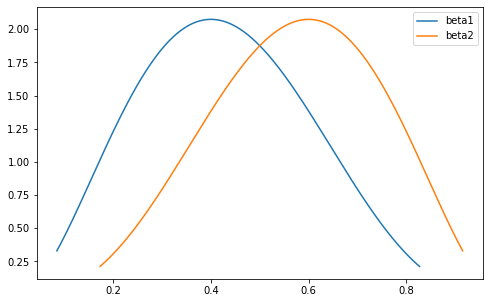

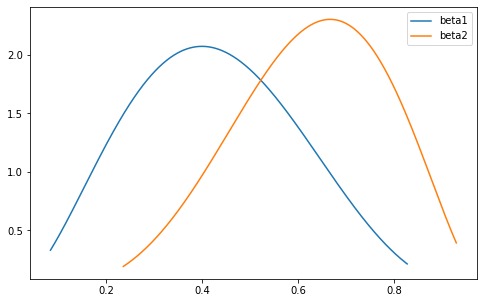

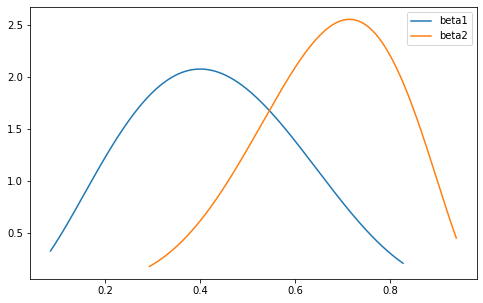

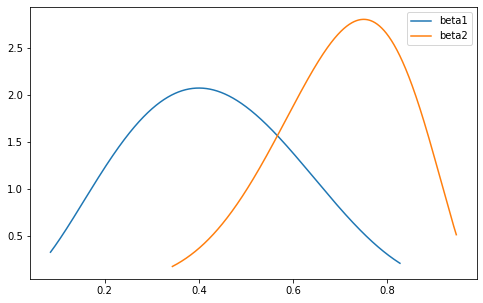

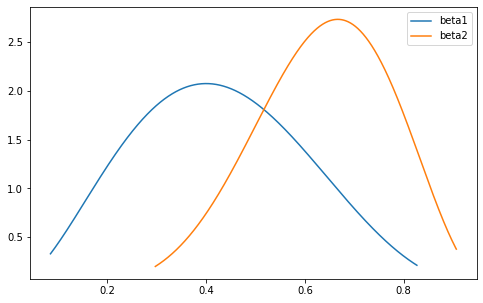

this was random!


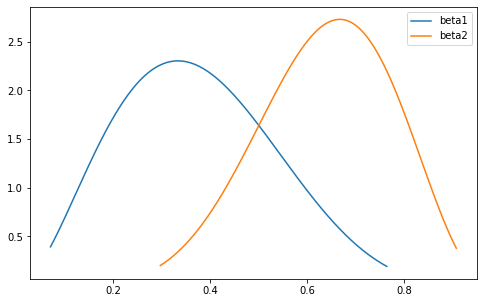

this was random!


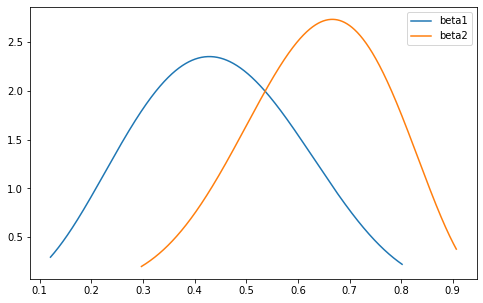

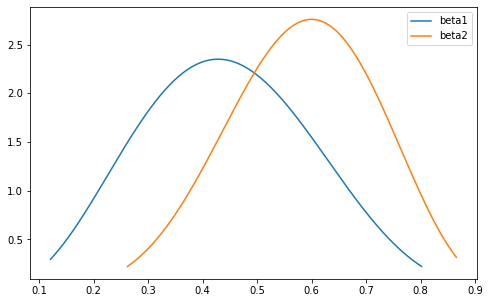

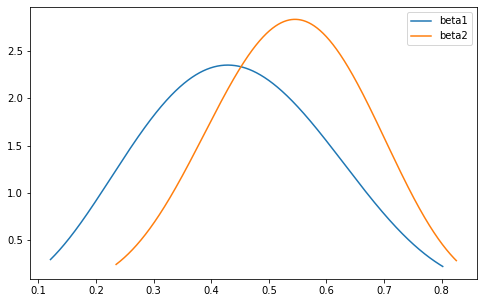

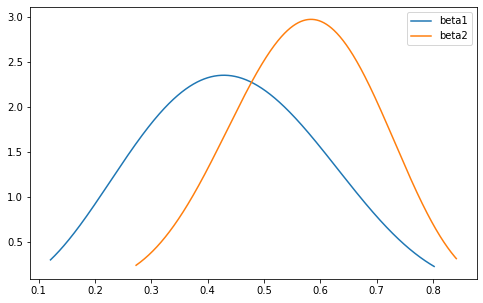

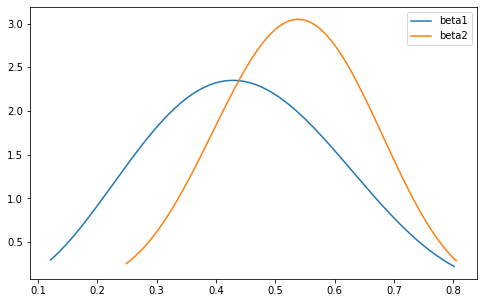

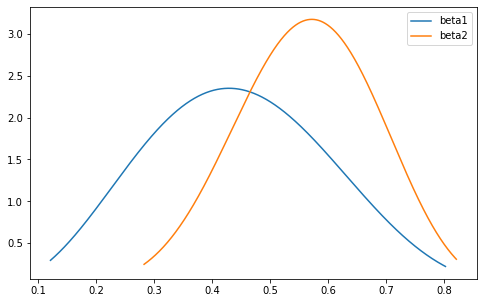

this was random!


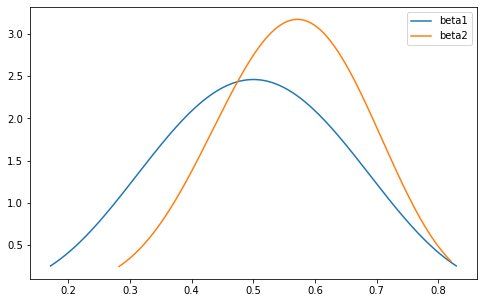

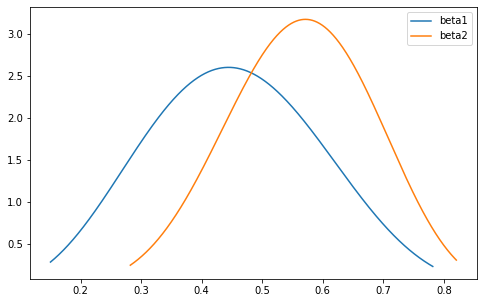

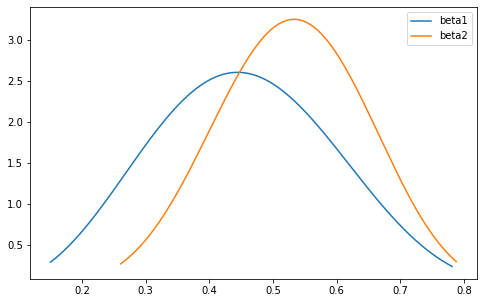

this was random!


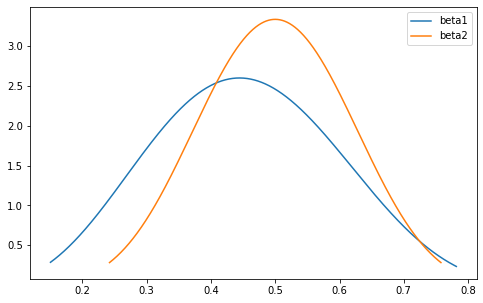

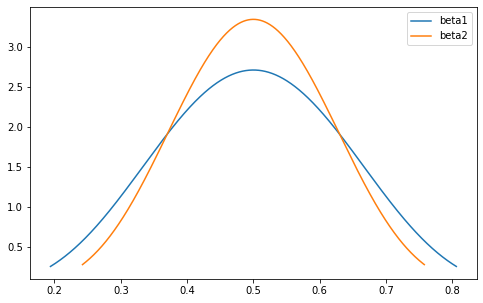

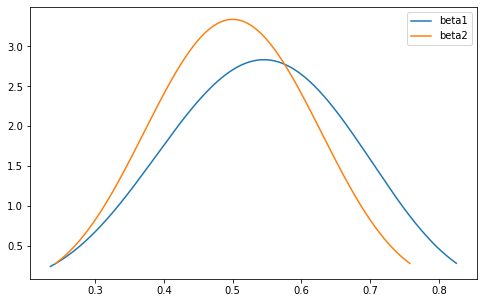

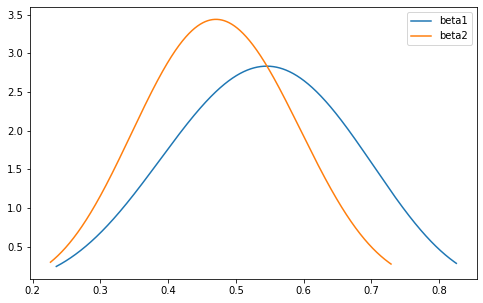

this was random!


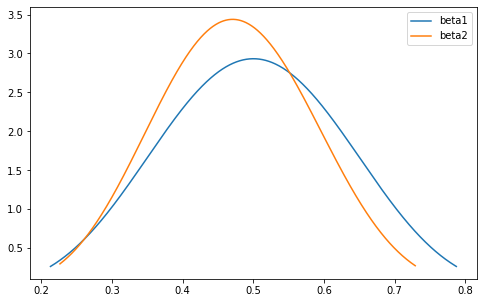

this was random!


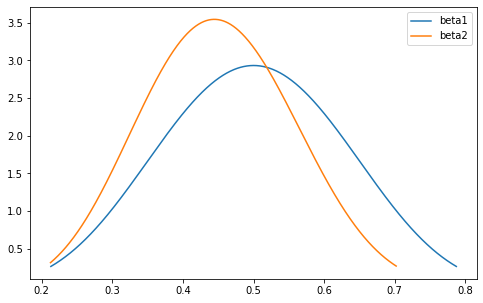

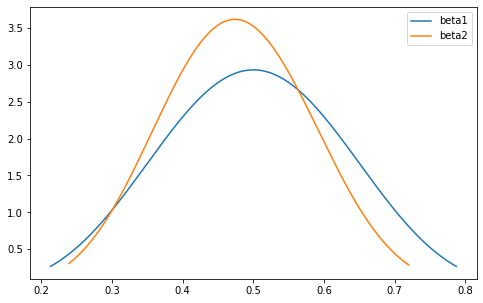

this was random!


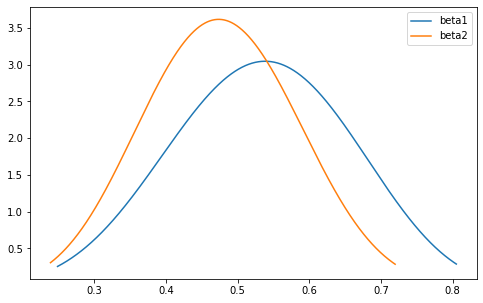

this was random!


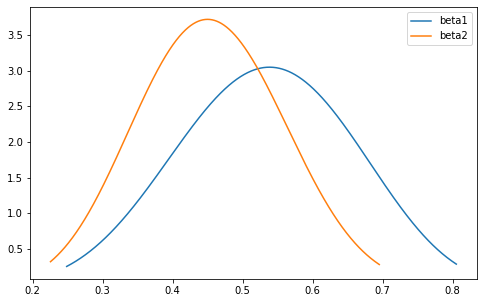

this was random!


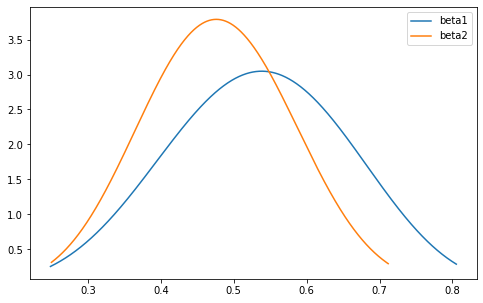

this was random!


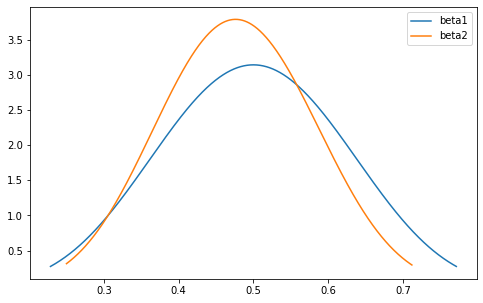

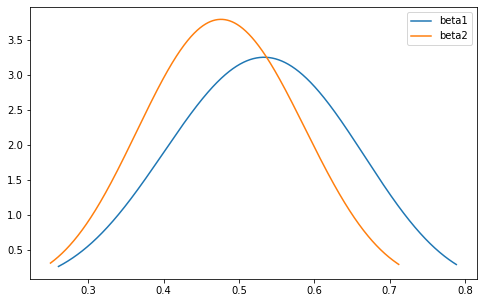

this was random!


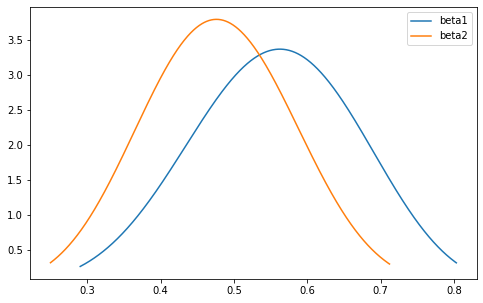

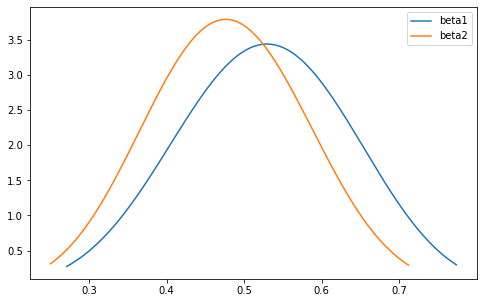

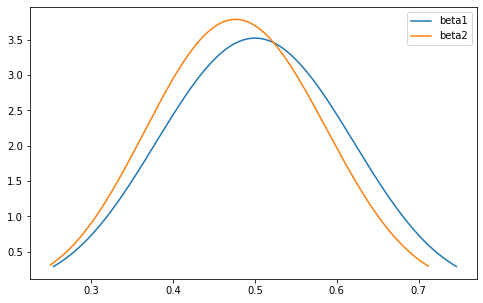

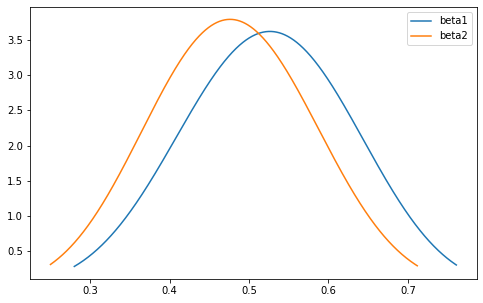

this was random!


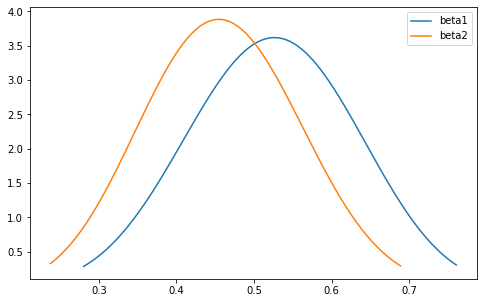

this was random!


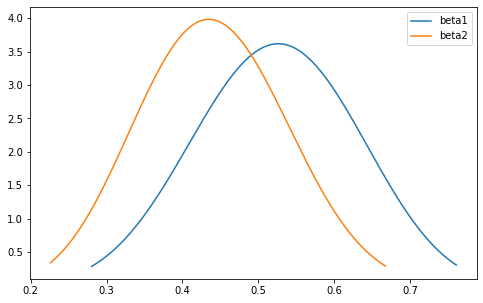

this was random!


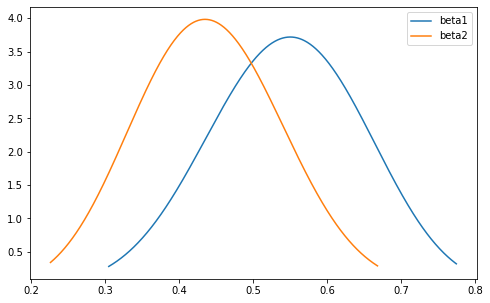

this was random!


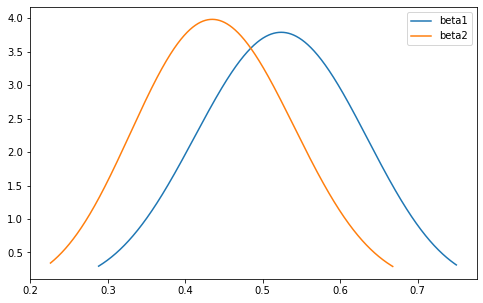

this was random!


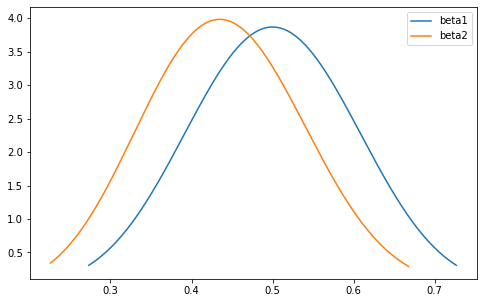

this was random!


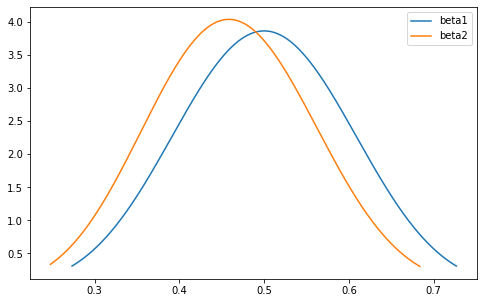

this was random!


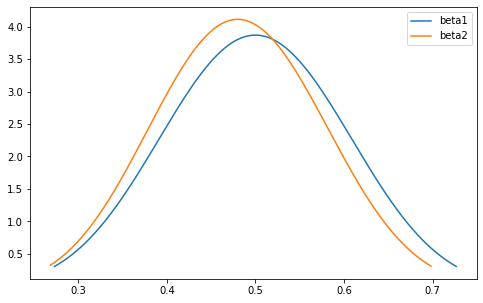

this was random!


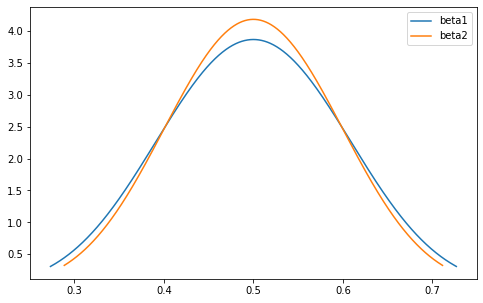

this was random!


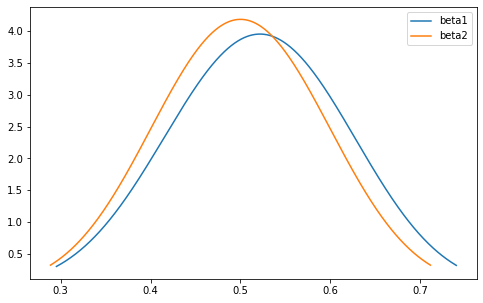

this was random!


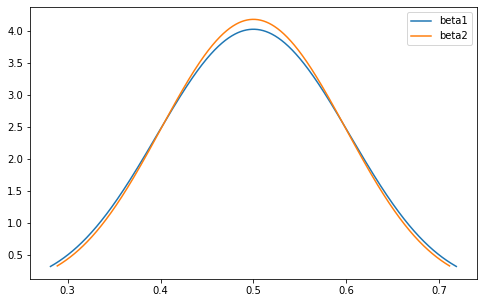

this was random!


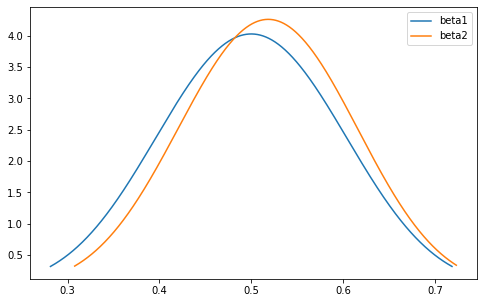

this was random!


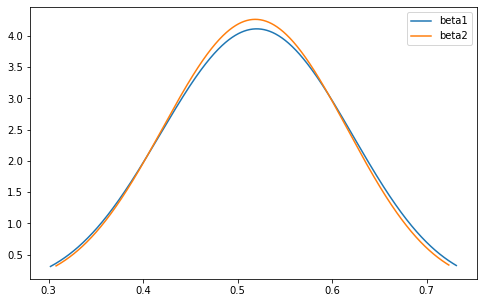

this was random!


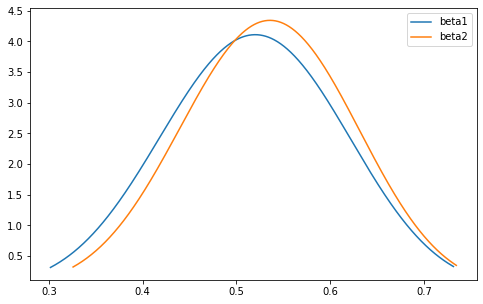

this was random!


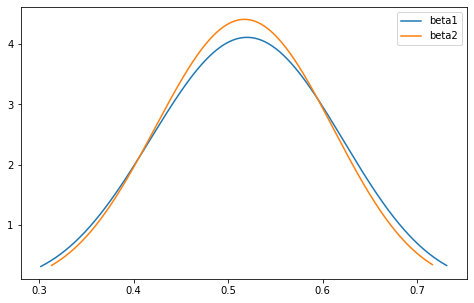

this was random!


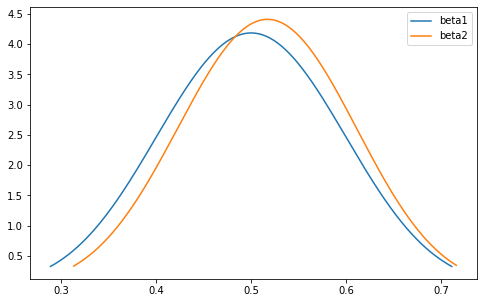

this was random!


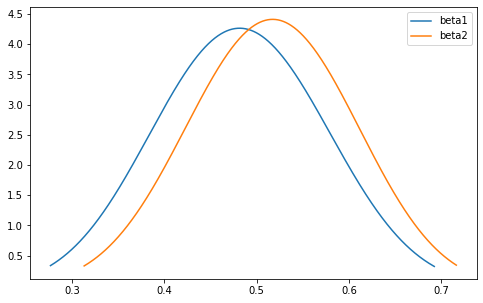

this was random!


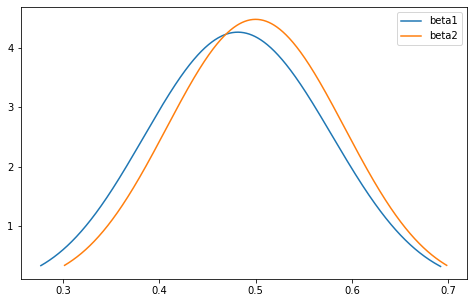

this was random!


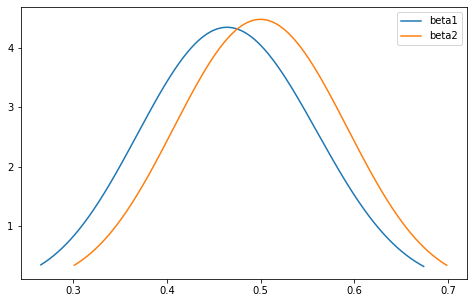

this was random!


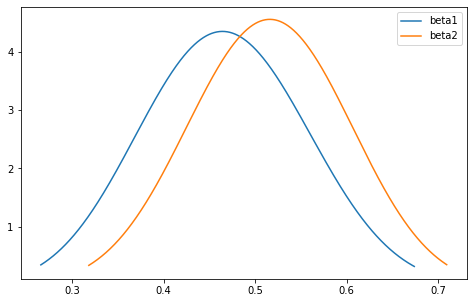

this was random!


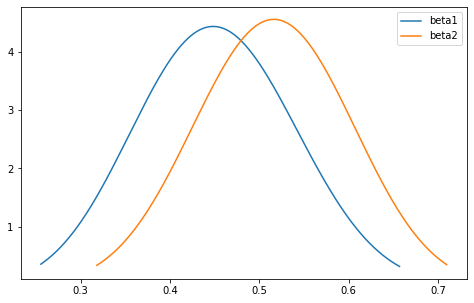

this was random!


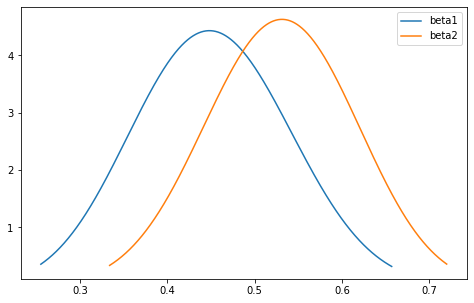

this was random!


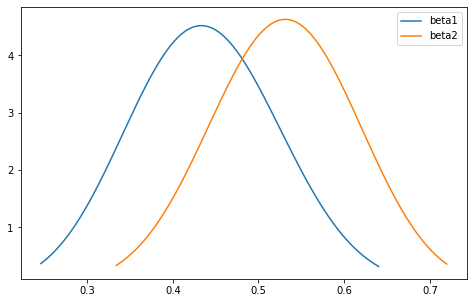

this was random!


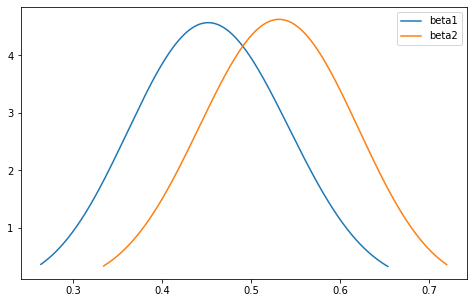

this was random!


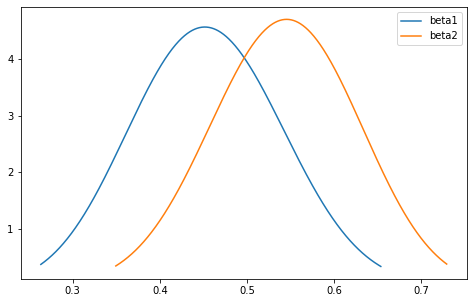

this was random!


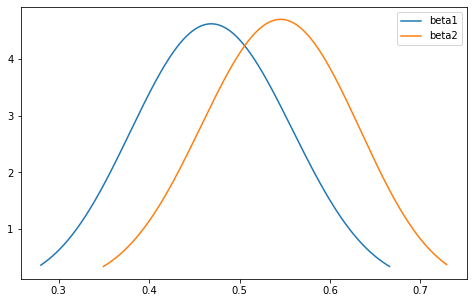

this was random!


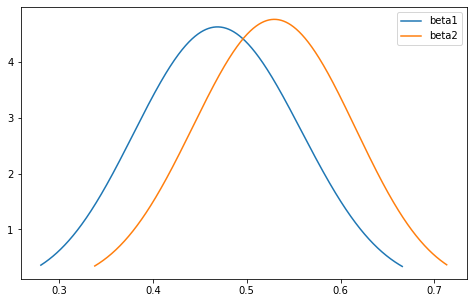

this was random!


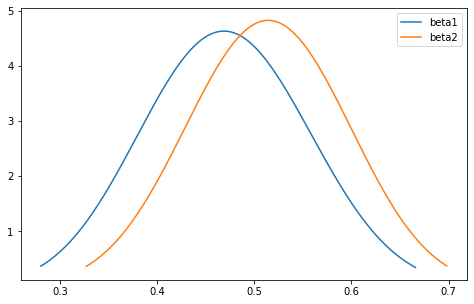

this was random!


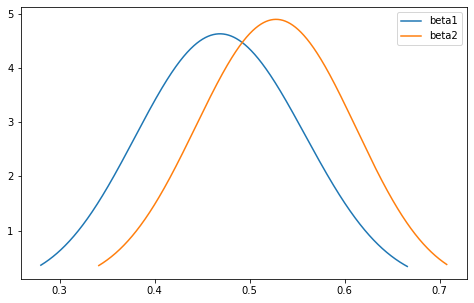

this was random!


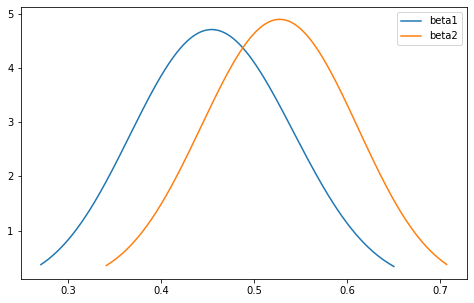

this was random!


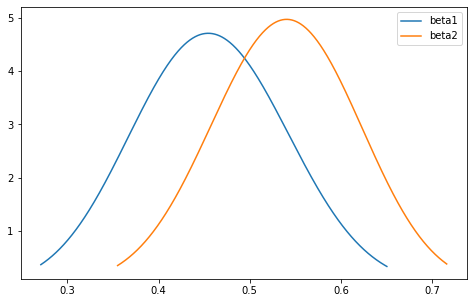

this was random!


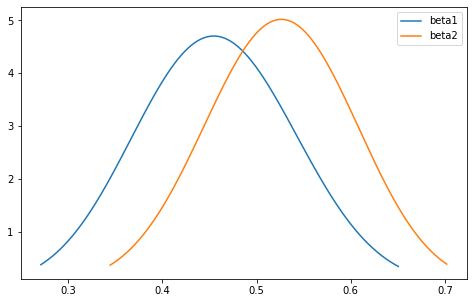

this was random!


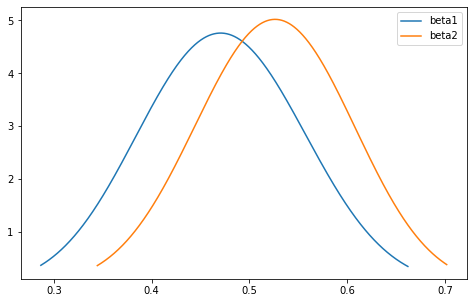

this was random!


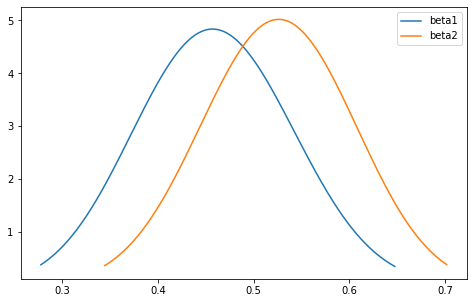

this was random!


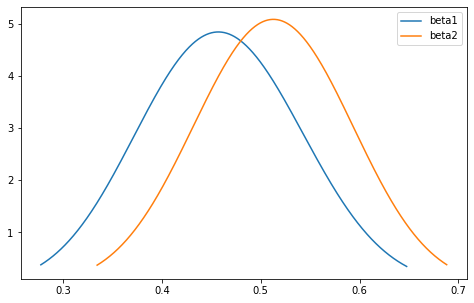

this was random!


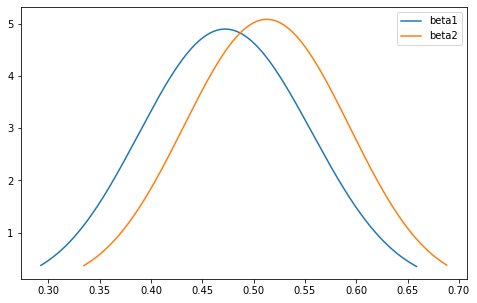

this was random!


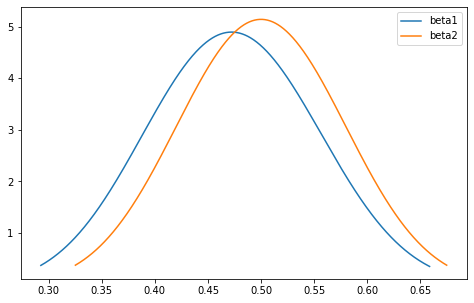

this was random!


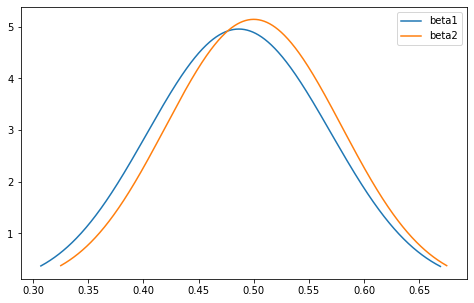

this was random!


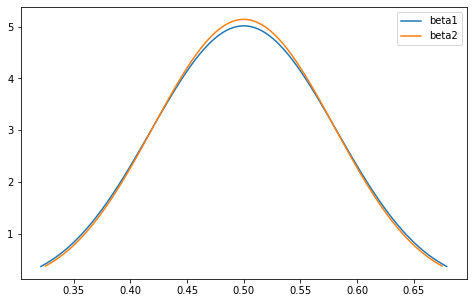

this was random!


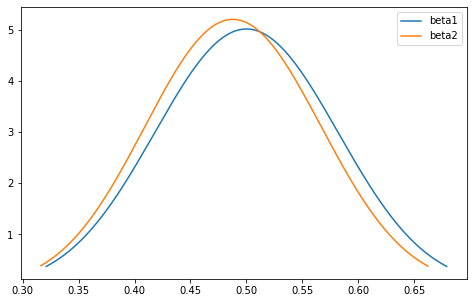

this was random!


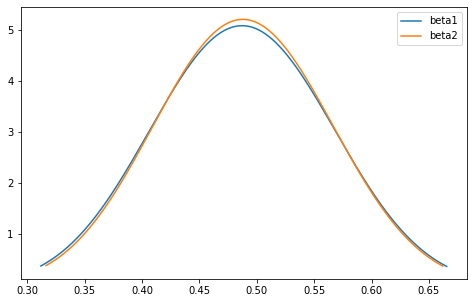

this was random!


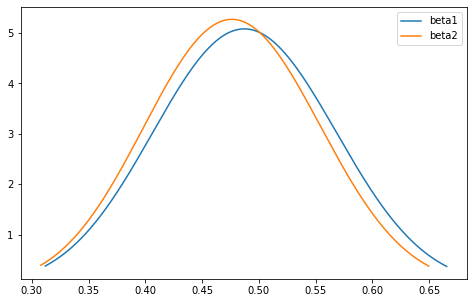

this was random!


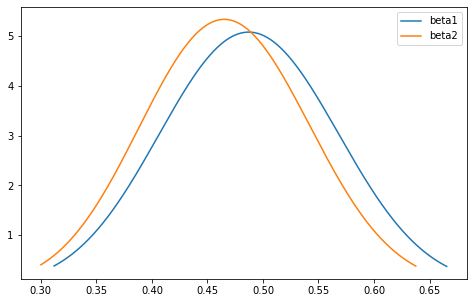

this was random!


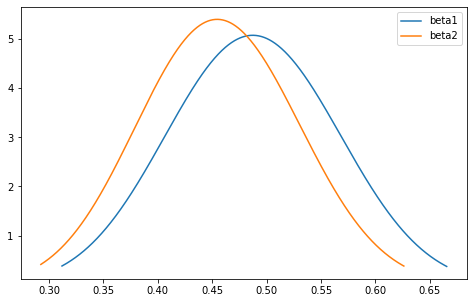

this was random!


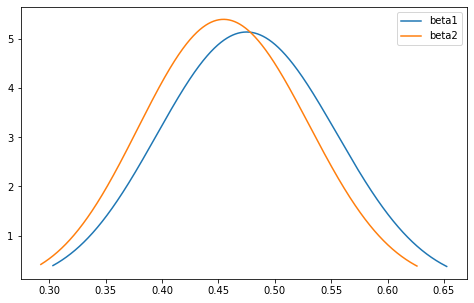

this was random!


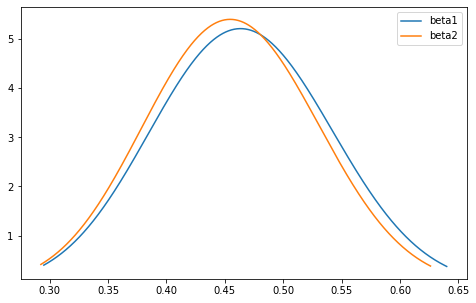

this was random!


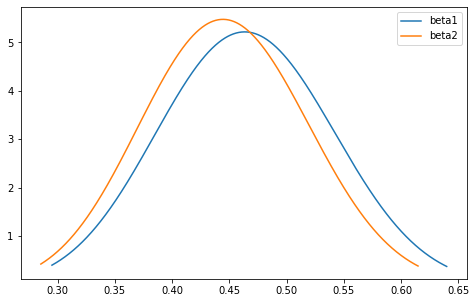

this was random!


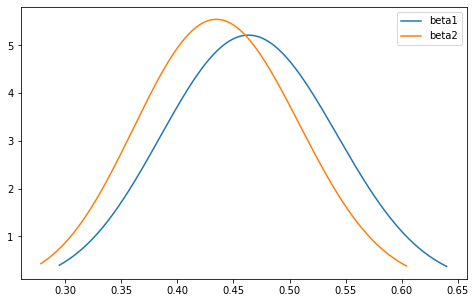

this was random!


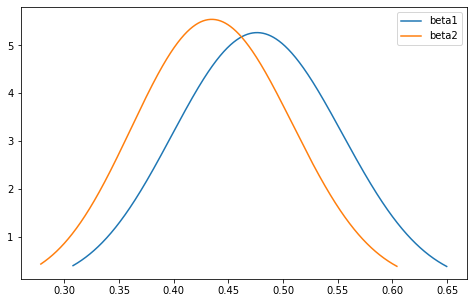

this was random!


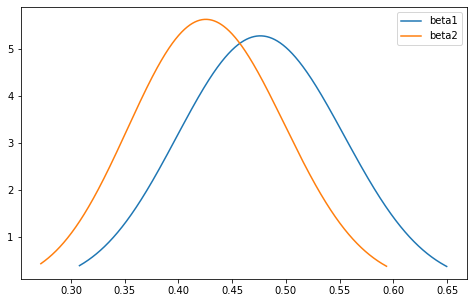

this was random!


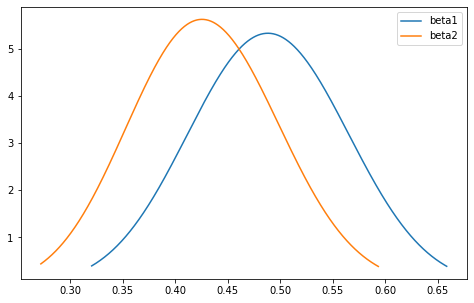

this was random!


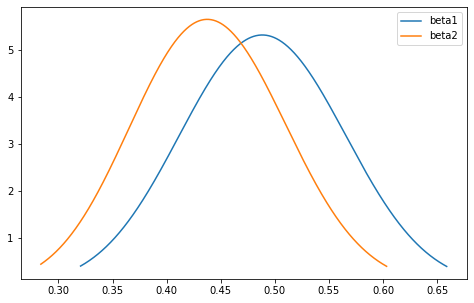

this was random!


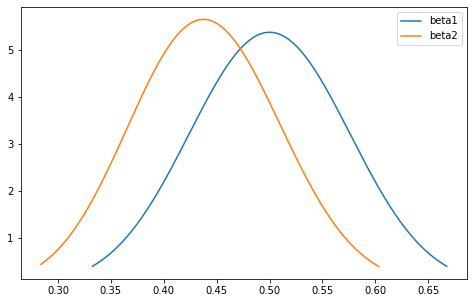

this was random!


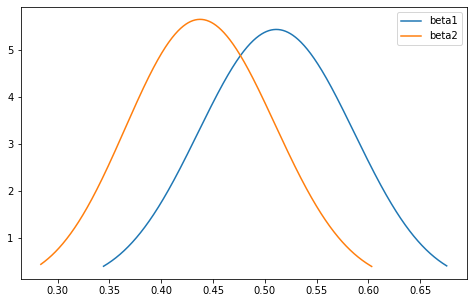

this was random!


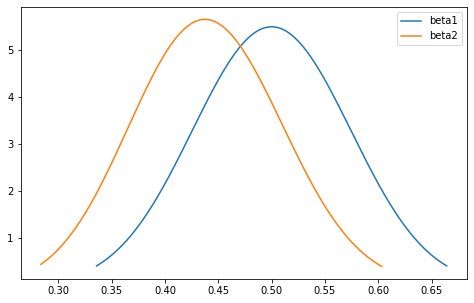

this was random!


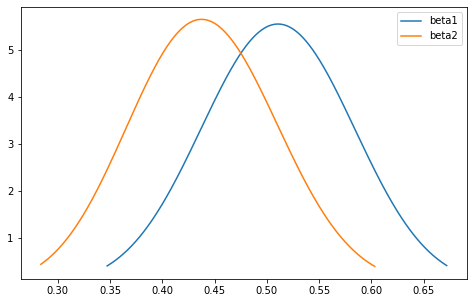

this was random!


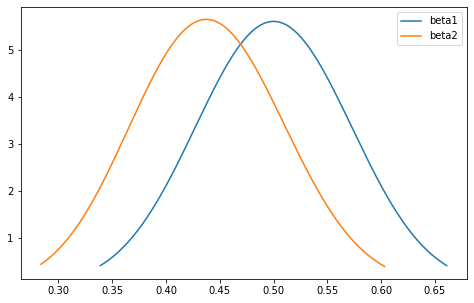

this was random!


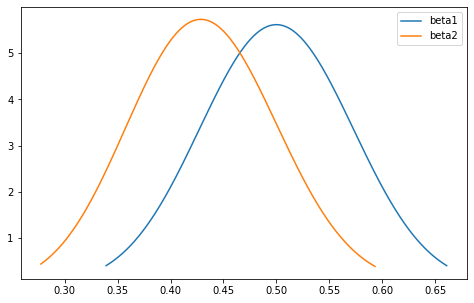

this was random!


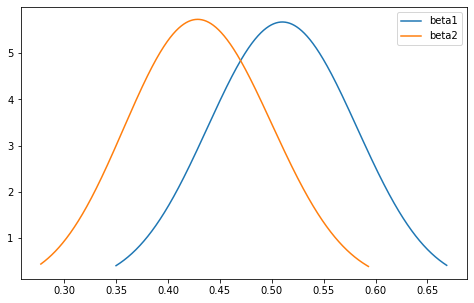

this was random!


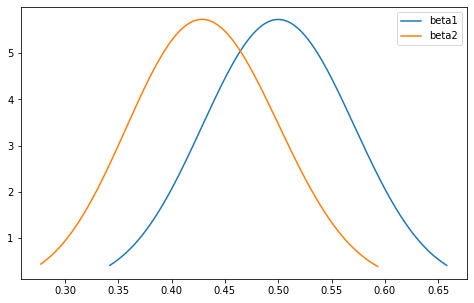

this was random!


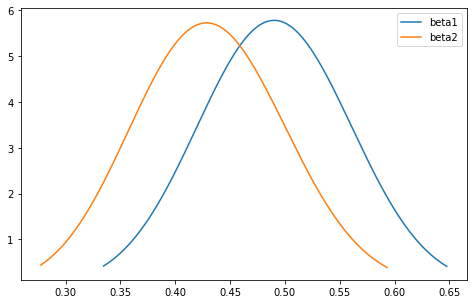

In [173]:
# beta distributions
# params = a, b
beta1 = scs.beta(a=1, b=1) # webpage A
beta2 = scs.beta(a=1, b=1) # webpage B 
epsilon = 0.00

plot_beta_distributions(beta1, beta2)

for n in range(100):
    epsilon += 0.02
    choice = choose_page(beta1, beta2, epsilon=epsilon)
    engagement = did_engage()
    if choice:
        beta2 = change_beta(beta2, engagement)
    else:
        beta1 = change_beta(beta1, engagement)

    plot_beta_distributions(beta1, beta2)

# What did we learn today? 
* cumulative regret
* multi-arm bandit testing
* difference between exploitation and exploration 
* pros and cons of ab testing
* PDF stands for probability density function
* pd.get_dummies()
    * gets them dummies
* np.random.beta (I learned this too)
* how to get a boolean for each action